In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch as pyt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import csv
from collections import Counter
import yfinance as yf
import random
import time
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing the required libraries

In [ ]:
!pip install --upgrade mplfinance
import mplfinance as mpf
#importing mplfinance for candlestick plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
data_A1 = pd.read_csv("/content/drive/MyDrive/ee782_assignment1_200070063_stocks/A_1min.csv")
data_A1
#import stocks data

,Date Time,Open,High,Low,Close,Volume
0,2005-01-03 09:30:00,14.8242,14.8242,14.8181,14.8242,173492
1,2005-01-03 09:31:00,14.8242,14.8242,14.8119,14.8119,9646
2,2005-01-03 09:32:00,14.8119,14.8242,14.8119,14.8181,34810
3,2005-01-03 09:33:00,14.8181,14.8242,14.8181,14.8242,11464
4,2005-01-03 09:34:00,14.8242,14.8242,14.8181,14.8181,12302
...,...,...,...,...,...,...
1680045,2022-02-25 16:02:00,133.7300,133.7300,133.7300,133.7300,354729
1680046,2022-02-25 16:03:00,133.7300,133.7300,133.7300,133.7300,6777
1680047,2022-02-25 16:10:00,133.7300,133.7300,133.7300,133.7300,0
1680048,2022-02-25 18:30:00,133.7300,133.7300,133.7300,133.7300,0


In [ ]:
def modified(stocks_data):
  start_time = pd.to_datetime('09:30:00').time()
  end_time = pd.to_datetime('16:00:00').time()
  stocks_data['Date Time']=pd.to_datetime(stocks_data['Date Time'],format='%Y-%m-%d %H:%M:%S')#converting Date Time column in datetime format
  stocks_data=stocks_data[(stocks_data['Date Time'].dt.time >= start_time) & (stocks_data['Date Time'].dt.time <= end_time)]#taking only the values between the start_time and end_time,used as a mask
  return stocks_data
#taking only the stocks between 9:30am and 4:00pm each day

In [ ]:
data_A1=modified(data_A1)
data_A1

,Date Time,Open,High,Low,Close,Volume
0,2005-01-03 09:30:00,14.8242,14.8242,14.8181,14.8242,173492
1,2005-01-03 09:31:00,14.8242,14.8242,14.8119,14.8119,9646
2,2005-01-03 09:32:00,14.8119,14.8242,14.8119,14.8181,34810
3,2005-01-03 09:33:00,14.8181,14.8242,14.8181,14.8242,11464
4,2005-01-03 09:34:00,14.8242,14.8242,14.8181,14.8181,12302
...,...,...,...,...,...,...
1680040,2022-02-25 15:55:00,133.3100,133.4300,133.2300,133.3400,16474
1680041,2022-02-25 15:56:00,133.3300,133.4400,133.3100,133.4200,24689
1680042,2022-02-25 15:57:00,133.4300,133.4300,133.3100,133.3500,27091
1680043,2022-02-25 15:58:00,133.3500,133.4000,133.2800,133.3200,28021


# 1.Plot between Close Price and Time

In [ ]:
def closingprice_vs_minbymin_plot(start_year,stocks_data,end_year=0):#defining a function for ploting between closing price vs every minute for a given range of years
   if end_year==0:#if end_year not given then consider only stocks in start_year
     end_year=start_year
   duration = stocks_data[(stocks_data['Date Time'].dt.year >= start_year) & (stocks_data['Date Time'].dt.year <= end_year)]#taking the mask of the values only between start_year and end_year(filterting)
   time = duration['Date Time']#taking the time from the stocks data
   closing_price=duration['Close']#taking closing price from the stocks data
   plt.figure(figsize =(15,7))#ploting the plot of required size
   plt.plot(time,closing_price)
   plt.title(f'Closing Prices vs. Time for {start_year} to {end_year}')
   plt.xlabel('Time')
   plt.ylabel('Close Price')
   plt.xticks(time[4095::8190], time.dt.strftime('%Y-%b')[4095::8190],rotation=45)#labeling xaxis with the month name at nearly middle of the month with a gap of nearly 21days (8190min) since stocks run for nearly 21days in a month(excluding holidays and weekends)
   plt.show()

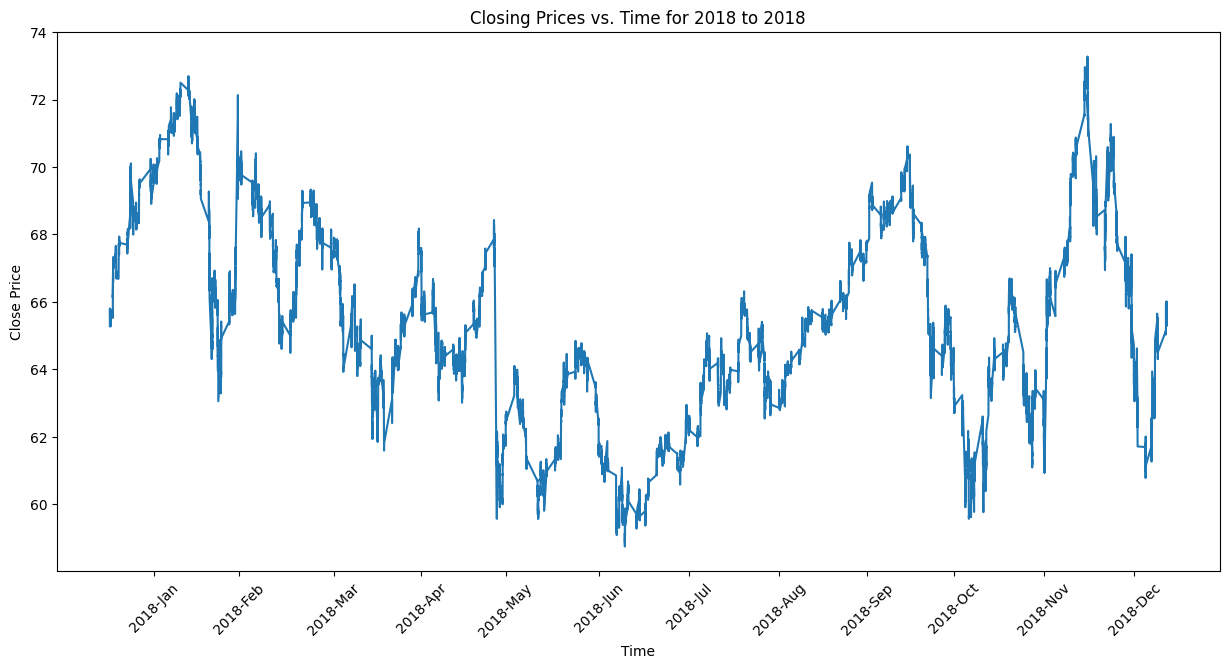

In [ ]:
closingprice_vs_minbymin_plot(2018,data_A1)

In [ ]:
def closingprice_vs_datebydate_plot(start_year,stocks_data,end_year=0):#defining a function for ploting between closing price vs every day for a given range of years
   if end_year==0 : #if endyear not given, take values only of startyear
     end_year=start_year
   ending_time = pd.to_datetime('15:59:00').time()#mientioning ending time of each day to take closing value
   data_day = stocks_data[(stocks_data['Date Time'].dt.year >= start_year) & (stocks_data['Date Time'].dt.year <= end_year)&(stocks_data['Date Time'].dt.time==ending_time)]#masking the data with the filter by taking only the values between start_year and end_year and also only the value at end of the each day in working hrs(16:00:00)
   time = data_day['Date Time']
   closing_price = data_day['Close']
  # Plotting script
   plt.figure(figsize =(15,7))
   plt.plot(time,closing_price)
   plt.title(f'Closing Prices vs. Time for {start_year} to {end_year}')
   plt.xlabel('Time')
   plt.ylabel('Close Price')
   plt.xticks(time[11::21], time.dt.strftime('%Y-%b')[11::21],rotation=45)#labeling xaxis with the month name at nearly middle of the month with a gap of nearly 21days since stocks run for nearly 21days in a month(excluding holidays and weekends)
   plt.show()

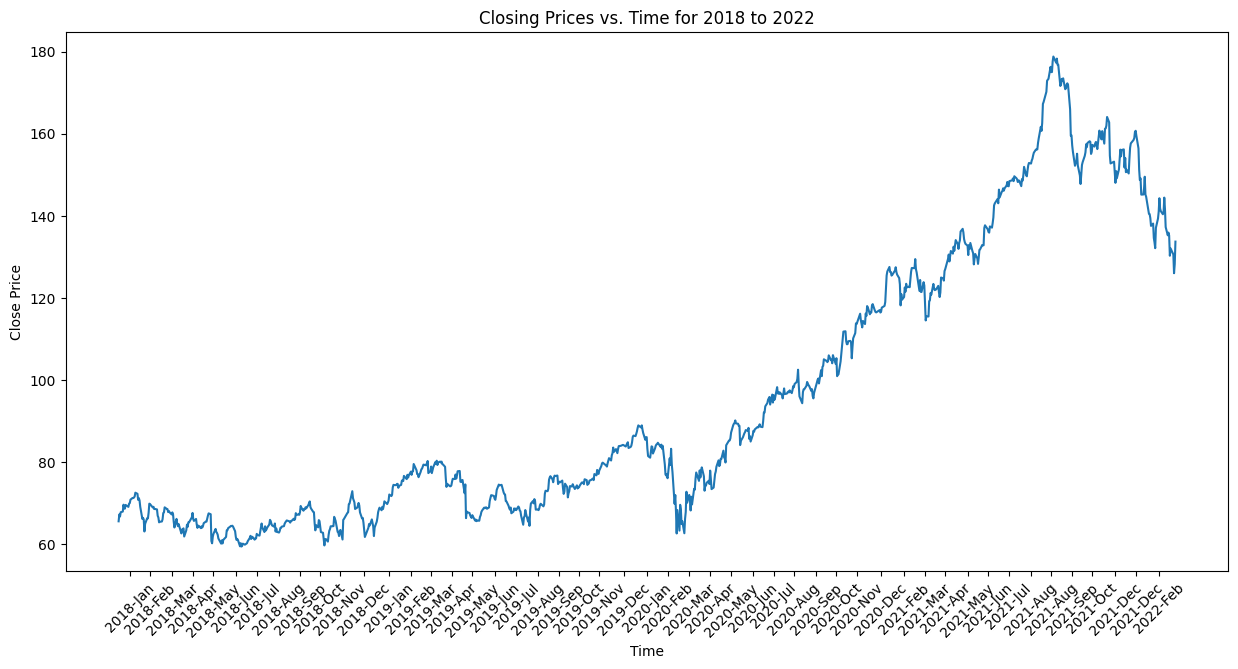

In [ ]:
closingprice_vs_datebydate_plot(2018,data_A1,2022)

In [ ]:
def candlestick_plot(start_time,stocks_data,end_time):#defining candlestickplot
  #stocks_data['Date Time'] = pd.to_datetime(stocks_data['Date Time'])
  stocks_data.set_index('Date Time', inplace=True)#setting date time column as index
  start =start_time#taking start time
  end= end_time#taking end time
  subset_data = stocks_data.loc[start:end]#taking subset of the data between start time and end time
  #Define the AddPlot object for volume
  volume = mpf.make_addplot(subset_data["Volume"], panel=1, color="blue", width=0.7, ylabel="volume",
                          secondary_y=True)

  #Plot the candlestick chart with volume on the secondary y-axis

  mpf.plot(
      subset_data,
      type='candle',
      addplot=[volume],
      style='charles',
      title=f'stocks, {start} - {end} (with Volume)',
      ylabel='Price ($)',
  )

#https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fcoderzcolumn.com%2Ftutorials%2Fdata-science%2Fcandlestick-chart-in-python-mplfinance-plotly-bokeh

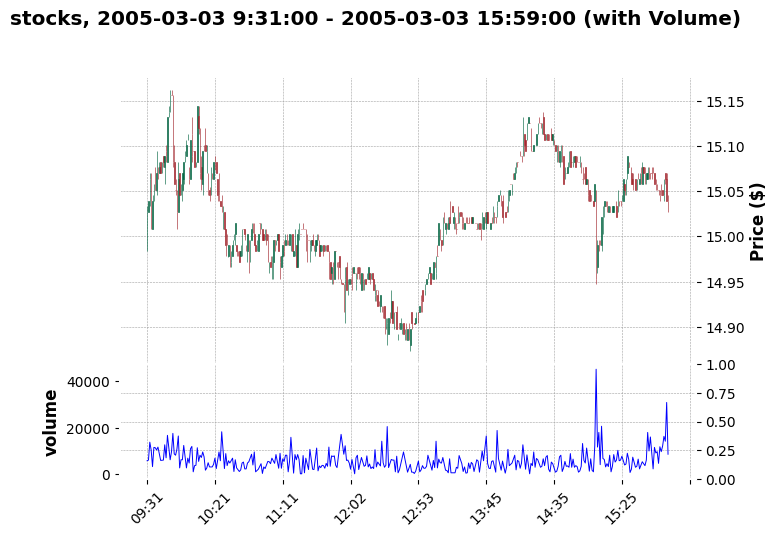

In [ ]:
candlestick_plot('2005-03-03 9:31:00',data_A1,'2005-03-03 15:59:00')# ploting the candlestick plot for the required data between given start time and end time


observations :


1.   At the start of the day and end of the day there is huge volume of shares are traded
2.   There are some unexpected jumps in the data on other days where some data is missing


In [ ]:
data_A1

,Open,High,Low,Close,Volume
Date Time,,,,,
2005-01-03 09:30:00,14.8242,14.8242,14.8181,14.8242,173492
2005-01-03 09:31:00,14.8242,14.8242,14.8119,14.8119,9646
2005-01-03 09:32:00,14.8119,14.8242,14.8119,14.8181,34810
2005-01-03 09:33:00,14.8181,14.8242,14.8181,14.8242,11464
2005-01-03 09:34:00,14.8242,14.8242,14.8181,14.8181,12302
...,...,...,...,...,...
2022-02-25 15:55:00,133.3100,133.4300,133.2300,133.3400,16474
2022-02-25 15:56:00,133.3300,133.4400,133.3100,133.4200,24689
2022-02-25 15:57:00,133.4300,133.4300,133.3100,133.3500,27091


In [ ]:
#data = pd.DataFrame(data, index=data['Date Time'])
#data=data.reset_index(drop=True)
#data

# 2.Normalizing the Data
Used two different ways to normalize the data
1.MinMaxScaler
2.z-scaler

In [ ]:
min_max_scaler = MinMaxScaler()#applying minmaxscaler for normalization of data(1st method)

# Apply Min-Max Scaling to the dataset
data_minmax = min_max_scaler.fit_transform(data_A1)

# Convert the scaled data back to a DataFrame for readability
df_minmax = pd.DataFrame(data_minmax, columns=data_A1.columns)
df_minmax.insert(0, 'Date Time',data_A1.index.values)
df_minmax

,Date Time,Open,High,Low,Close,Volume
0,2005-01-03 09:30:00,0.039682,0.039640,0.040719,0.040227,0.073304
1,2005-01-03 09:31:00,0.039682,0.039640,0.040683,0.040155,0.004075
2,2005-01-03 09:32:00,0.039610,0.039640,0.040683,0.040191,0.014708
3,2005-01-03 09:33:00,0.039646,0.039640,0.040719,0.040227,0.004843
4,2005-01-03 09:34:00,0.039682,0.039640,0.040719,0.040191,0.005197
...,...,...,...,...,...,...
1659356,2022-02-25 15:55:00,0.732361,0.732967,0.732382,0.732604,0.006960
1659357,2022-02-25 15:56:00,0.732478,0.733025,0.732849,0.733071,0.010431
1659358,2022-02-25 15:57:00,0.733063,0.732967,0.732849,0.732662,0.011446
1659359,2022-02-25 15:58:00,0.732595,0.732791,0.732674,0.732487,0.011839


In [ ]:
z_score_scaler = StandardScaler()# applying standardscaler for normalization of data(2nd method)

# Apply Z-Score Standardization to the dataset
data_zscore = z_score_scaler.fit_transform(data_A1)

# Convert the standardized data back to a DataFrame for readability
df_zscore = pd.DataFrame(data_zscore, columns=data_A1.columns)
df_zscore.insert(0, 'Date Time',data_A1.index.values)
df_zscore

,Date Time,Open,High,Low,Close,Volume
0,2005-01-03 09:30:00,-0.870390,-0.870583,-0.870378,-0.870394,9.760535
1,2005-01-03 09:31:00,-0.870390,-0.870583,-0.870559,-0.870752,0.101594
2,2005-01-03 09:32:00,-0.870748,-0.870583,-0.870559,-0.870572,1.585045
3,2005-01-03 09:33:00,-0.870567,-0.870583,-0.870378,-0.870394,0.208768
4,2005-01-03 09:34:00,-0.870390,-0.870583,-0.870378,-0.870572,0.258169
...,...,...,...,...,...,...
1659356,2022-02-25 15:55:00,2.578219,2.580557,2.577079,2.579126,0.504114
1659357,2022-02-25 15:56:00,2.578801,2.580848,2.579408,2.581454,0.988399
1659358,2022-02-25 15:57:00,2.581711,2.580557,2.579408,2.579417,1.130000
1659359,2022-02-25 15:58:00,2.579383,2.579684,2.578535,2.578543,1.184825


MinMAX scaling is better than z score because the normalised values in minmax will always be greater than 0 where in z score they will go below zero also . There can be some problems may occur while calculating the profit or loss based on percentages if we have negative values


#3.
a)
 I took long term frequency (multi week or multi year) this allows to track the trends in stock prices over years

b) I have taken 1% as tax+commission on the stock whether we buy or sell
  
c)I have done only prediction for a single stock

In [ ]:
import torch
import torch.nn as nn
#importing torch, nn for LSTM and Dataloader

# 4.LSTM Model
Inputs are input dimension, no.of units and no.of layers

In [ ]:
class LSTM(nn.Module):#defining a LSTM module
  def __init__(self,input_size,hiddeninput_size,output_size,num_layers):
    super(LSTM,self).__init__()
    self.hiddeninput_size = hiddeninput_size#this parameter determines the number of LSTM units in each layer.
    self.num_layers = num_layers#no.of layers
    self.lstm = nn.LSTM(input_size,hiddeninput_size,num_layers,batch_first = True)# Creating the LSTM model with input size, hidden size and number layers
    self.fc = nn.Linear(hiddeninput_size,output_size)# This is the last layer which is connecting the hidden of the LSTM to output layer
  def forward(self, x):
    out, _ = self.lstm(x)# Forward pass for the LSTM , Here output of LSTM model will be in format out,(h,c). we are neglecting the (h,c)
    out = self.fc(out[:, -1, :])# so taking only the output value by taking out[:,-1,:]
    return out

# 5.Dataloader for LSTM model
Creating a dataloader model for training and testing the LSTM model. Here sequence length is given as input and next upcoming value as output

In [ ]:
from torch.utils.data import Dataset, DataLoader#importing dataset, dataloader from torch
class Stocks(Dataset):
    def __init__(self,data, sequence_length):#intiating stocks def
        self.data = data
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length#intiating sequence_length(each input sequence passed to the LSTM have sequence_length prices)

    def __getitem__(self, idx):
        idx += self.sequence_length#intially assign idx to zero and defining upto which element we have to consider it
        features = self.data.iloc[idx - self.sequence_length:idx, :] #assigning the sequence length numnber of elements as input or features
        target = self.data.iloc[idx, 3]  # Assuming 'close' is the target
        return torch.tensor(features.values,dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

Resampling the data for each day, by taking the aggregation of whole prices for a day, for easy training and testing

Resampling reduces frequency which helps in easier calculation during training and testing

In [ ]:
def resample(stocks_data, x = '1d'):
    agg = { "Open": "first", # By defining the agg we can get the respective type of values from the frequency of the data
            "High": "max",   # example : here open:first means i will give the value of the first , where as low:min will give the minimum value
            "Low": "min",
            "Close": "last",
            "Volume": "sum"
              }
    stocks_data = stocks_data.resample('{}'.format(x), origin='start').agg(agg).dropna()
    return stocks_data

In [ ]:
data_A1

,Open,High,Low,Close,Volume
Date Time,,,,,
2005-01-03 09:30:00,14.8242,14.8242,14.8181,14.8242,173492
2005-01-03 09:31:00,14.8242,14.8242,14.8119,14.8119,9646
2005-01-03 09:32:00,14.8119,14.8242,14.8119,14.8181,34810
2005-01-03 09:33:00,14.8181,14.8242,14.8181,14.8242,11464
2005-01-03 09:34:00,14.8242,14.8242,14.8181,14.8181,12302
...,...,...,...,...,...
2022-02-25 15:55:00,133.3100,133.4300,133.2300,133.3400,16474
2022-02-25 15:56:00,133.3300,133.4400,133.3100,133.4200,24689
2022-02-25 15:57:00,133.4300,133.4300,133.3100,133.3500,27091


In [ ]:
resampdata_A1 = resample(data_A1, x = '1d')
resampdata_A1

,Open,High,Low,Close,Volume
Date Time,,,,,
2005-01-03 09:30:00,14.8242,14.8734,14.4551,14.6827,3218618
2005-01-04 09:30:00,14.6274,14.7565,14.1783,14.3075,3655769
2005-01-05 09:30:00,14.2522,14.5474,14.2214,14.3014,3706235
2005-01-06 09:30:00,14.3936,14.4182,13.9569,13.9877,3052818
2005-01-07 09:30:00,13.9507,14.1168,13.9200,13.9630,2581548
...,...,...,...,...,...
2022-02-18 09:30:00,130.5000,133.4300,130.0000,132.0400,1296604
2022-02-22 09:30:00,130.8700,132.6899,129.2600,130.5850,1806574
2022-02-23 09:30:00,129.8800,134.3700,125.9500,126.0000,2304017


# 6.Train or pre-train the model by trying to predict the future price


In [ ]:
sequence_length = 15#keeping sequence length of 15
dataset = Stocks(resampdata_A1,sequence_length)#taking dataset from stocks function of resampled data
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)#making a dataloader of the dataset

Initializing the LSTM model by giving the required input values

In [ ]:
# Define the LSTM model
input_size = 5 # close, high, low ,open, volume columns
hidden_size = 64# this parameter determines the number of LSTM units in each layer.
output_size = 1  # Assuming 'close' is the target
num_layers = 2
model = LSTM(input_size, hidden_size, output_size, num_layers)

  # Define loss function and optimizer
criterion = nn.MSELoss()#using MSE as loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)#used Adam optimiser for back propagation

Diving the Train and Test data from the whole original data and sending them through the dataloader

In [ ]:
data_to_be_normalized = resampdata_A1[['Open', 'High', 'Low', 'Close', 'Volume']]#data is normalized
minmax = MinMaxScaler()
normalized_data = minmax.fit_transform(data_to_be_normalized)#data is normalized after resampling
# Create a DataFrame with the normalized data
norm_df = pd.DataFrame(normalized_data, columns=data_to_be_normalized.columns, index=data_to_be_normalized.index)

# Define the training and testing data
train_data = norm_df['2005':'2020']#data is divided into training and tesing data, # Taking all the data over the years except last two years which will be used for the testing
test_data = norm_df['2021':'2022']#last two years as test data

# Define the sequence length (adjust as needed)
sequence_length = 10

  # Create datasets and data loaders
train_dataset = Stocks(train_data, sequence_length)#creating dataset for calculating further
test_dataset = Stocks(test_data, sequence_length)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)#sending those dataset through dataloader
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
num_epochs = 20  # Adjust as needed


In [30]:
#Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch_features, batch_targets in train_loader:# we will get two out puts from the data loader 1) batch features and 2) batch targets
      optimizer.zero_grad()#making gradient zero before going to calculate for next batch
      outputs = model(batch_features)
      loss = criterion(outputs, batch_targets.unsqueeze(1))#calculating the loss
      loss.backward()# Its is back propagation
      optimizer.step()#updating the weights after each back prop step
      total_loss += loss.item()#calculating total loss

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader)}')#divind the loss w.r.t no.of elements so that the loss will be normalized

Epoch [1/20], Loss: 5.745815932251779e-05
Epoch [2/20], Loss: 6.060104285083186e-05
Epoch [3/20], Loss: 5.387261262512766e-05
Epoch [4/20], Loss: 4.9898606650660644e-05
Epoch [5/20], Loss: 5.0511019729865004e-05
Epoch [6/20], Loss: 4.9402950228088433e-05
Epoch [7/20], Loss: 5.345596545094085e-05
Epoch [8/20], Loss: 4.773359658082925e-05
Epoch [9/20], Loss: 4.242097652639218e-05
Epoch [10/20], Loss: 4.4293991560975666e-05
Epoch [11/20], Loss: 4.3740746569089845e-05
Epoch [12/20], Loss: 4.58345520388638e-05
Epoch [13/20], Loss: 4.1394049543351494e-05
Epoch [14/20], Loss: 3.921851410788284e-05
Epoch [15/20], Loss: 3.9343443281795194e-05
Epoch [16/20], Loss: 4.7825262934941476e-05
Epoch [17/20], Loss: 4.205104538876127e-05
Epoch [18/20], Loss: 4.263985257629039e-05
Epoch [19/20], Loss: 4.084097487239411e-05
Epoch [20/20], Loss: 3.886134878225026e-05


In [ ]:
# Testing loop
model.eval()
test_loss = 0
predicted_values = []
actual_values = []
with torch.no_grad():
  for batch_features, batch_targets in test_loader:
    outputs = model(batch_features)
    loss = criterion(outputs, batch_targets.unsqueeze(1))
    test_loss += loss.item()
    predicted_values.extend(outputs.squeeze(1).tolist())  # Convert to list and extend so we can use for ploting
    actual_values.extend(batch_targets.tolist())  # Convert to list and extend
  print(f'Test Loss: {test_loss/len(test_loader)}')#divind the loss w.r.t to no.of elements so that the loss will be normalized

Test Loss: 0.0005544208484934643


# 7.Trading module
Consider there is a 1% transaction charge for any stocks to either buy or sell. So if the predicted value is between 99% to 101% we will hold the stock, orelse we will sell if it is less than 99% and buy if it is more than 101%

In [ ]:
def trading_model(predicted_values,initial_balance,actual_values):
  stock_quantity = 0
  balance = initial_balance

  for i in range(1, len(predicted_values)):
      if predicted_values[i] > (1.01)*predicted_values[i-1]:#checking if the present predicted stock value is greater than 101% of the previous one, if yes, buy the stock
        # Buy stocks
          no_of_stocks_to_buy = balance // actual_values[i-1]
          stock_quantity += no_of_stocks_to_buy
          balance -= no_of_stocks_to_buy*(1.01) * actual_values[i-1]#so the amount to buy the stock is deleted from the balance
      elif predicted_values[i] < (0.99)*predicted_values[i-1]:#checking if the present predicted stock value is less than 99% of the previous one, if yes, sell the stock
        # Sell stocks
          balance += stock_quantity*(0.99) * actual_values[i-1]#so the balance is added with the price received by selling the stock
          stock_quantity = 0
  # If there are remaining stocks at the end, sell them
  balance += stock_quantity * actual_values[-1]#balance after selling the remaining stocks
  stock_quantity = 0

  print('Final Balance:',balance)



# 8.

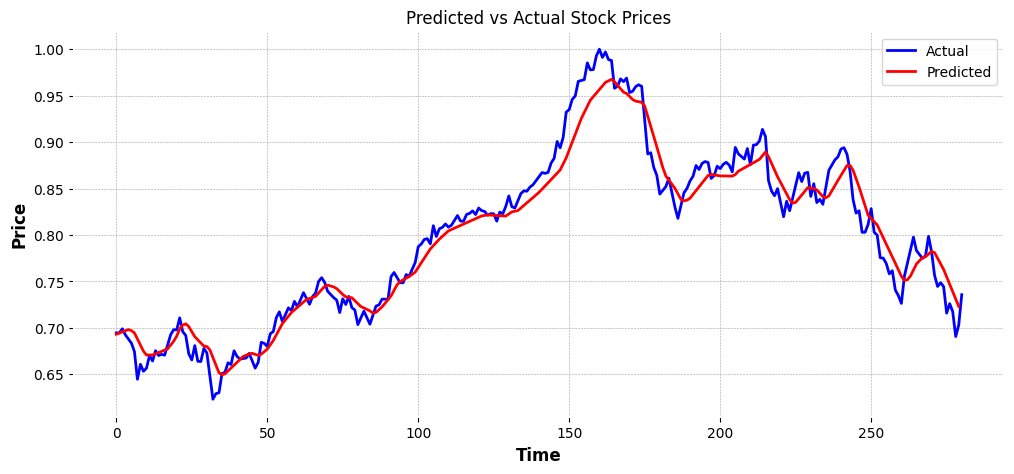

In [ ]:
plt.figure(figsize=(12, 5))
actual_values=[actual_values[0]]+actual_values  # Adding a extra element so that pedicted and target will match
plt.plot(actual_values, label='Actual', color='blue')# Plotting both the values in the same graph to see the difference between the actual and predicted values
plt.plot(predicted_values, label='Predicted', color='red')
plt.legend()

# Adding title and labels
plt.title('Predicted vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')

# Display the plot
plt.show()

# 8.
a)Yes, the price prediction error is increased as we move further from the last predicted value of the stock

b)Yes, we could get profits with tax and commission too.So when we take the percentage as a reference then we can see there are profits.There we could see the that the actual value is way larger than predicted value

c) This method may bring profits in shortterm, but in longterm this may not efficiently bring profits always, there could also be a huge loss, when the stock values changes rapidly


Students I have discussed with :

Seepana Venkata Sai Siddartha : 200070074 (Discussed question 1,3,8)

Deepika Ponnana : 20D110013 (Discussed question 4,6)

Some basic code blocks I have googled and took code from ChatGPT

Video Link- https://drive.google.com/file/d/1Zj9QUnCmZ2B5cagd2luWBpaAklOpFsq5/view?usp=sharing